In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


In [2]:
data = pd.read_csv('d:\Work\Data Analyst Practice\Python\creditcard_2023.csv')
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
data.shape

(568630, 31)

In [4]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [5]:
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# in case there are any missing values by replacing it with the average values
data.fillna(data.mean(), inplace = True)

In [ ]:
#Variables
#id won't be useful for our modeling and Class is the target variable dependent on that we want to predict
X = data.drop(['id', 'Class'], axis = 1, errors = 'ignore')
y = data['Class']

In [8]:
print(X.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [ ]:
#spliting our data into our trainnig and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 50)

In [ ]:
# our training dataset has 454904 rows and 29 columns
# out testing dataset has 113726 rows and 29 columns

print(X_train.shape)
print(X_test.shape)

(454904, 29)
(113726, 29)


In [ ]:
#scaling our features as it normalizes the range of feature values as it makes sures for accurate outcomes and prevents certain features from dominating the rest ofthe model due to their range
#certain algorithms for example k-nearest neighbors and neural networks works better when their data is scaled

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# check class distribution with 0 being not fraud and 1 being fraud

print(pd.Series(y_train).value_counts(normalize= True))

Class
1    0.500374
0    0.499626
Name: proportion, dtype: float64


In [ ]:
#training the model
#RandomForestClassifier is a machine learning model that combines multiple decision trees to make accurate prediction
#n_estimators determine how many trees in our forest
#max_depth limits the depth of the trees to prevent overfitting
#min_samples_split determines the minimum number of samples required to split an internal node in a tree

rf_model = RandomForestClassifier(
    n_estimators= 100, 
    max_depth= 10,
    min_samples_split= 5,
    random_state= 50
)

In [27]:
#cross validation in machine learning is a statistical method used to evaluate how well a model perfroms on an indepndent data set
#cv = 5 means that we use five fold cross validation
#scoring = 'f1' evaluates the model using f1 scores

cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv = 5, scoring= 'f1')
print("\nCross validation f1 scores: ", cv_scores)
print("Average f1 score:", np.mean(cv_scores))


Cross validation f1 scores:  [0.98534664 0.98483161 0.98370668 0.98569808 0.98515469]
Average f1 score: 0.9849475384727532


In [28]:
#training the random forest model on the entire training dataset after determing the performance using cross validation

rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50,
                       random_state=50)

In [30]:
#time to make prediction 

y_pred = rf_model.predict(X_test_scaled)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     57033
           1       1.00      0.97      0.99     56693

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



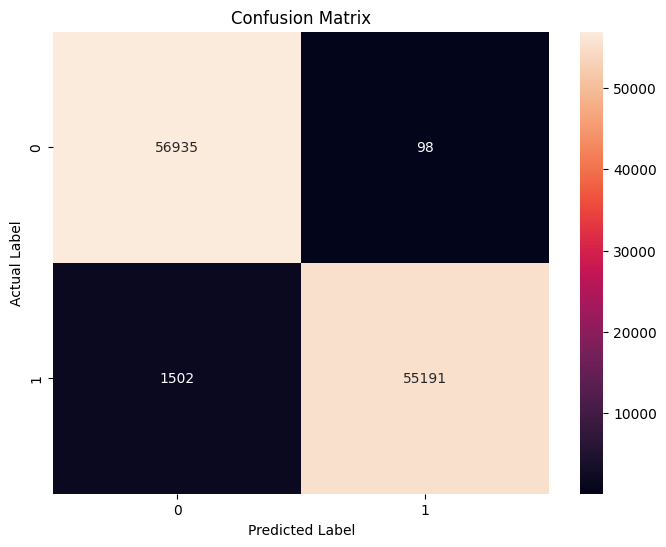

In [36]:
#making our confusion matrix

plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
#extracting the importance of each feature as determined by the random forest model
# or in other words feature importance dtermines how much a feature adds to reducing the impurity in the trees with higher values meaning more importance or significance

importance = rf_model.feature_importances_
feature_imp = pd.DataFrame({
    'Feature':X.columns,
    'Importance': importance
}).sort_values('Importance', ascending = False)

feature_imp.head()

,Feature,Importance
13,V14,0.193645
3,V4,0.158777
11,V12,0.137970
16,V17,0.109455
10,V11,0.092325


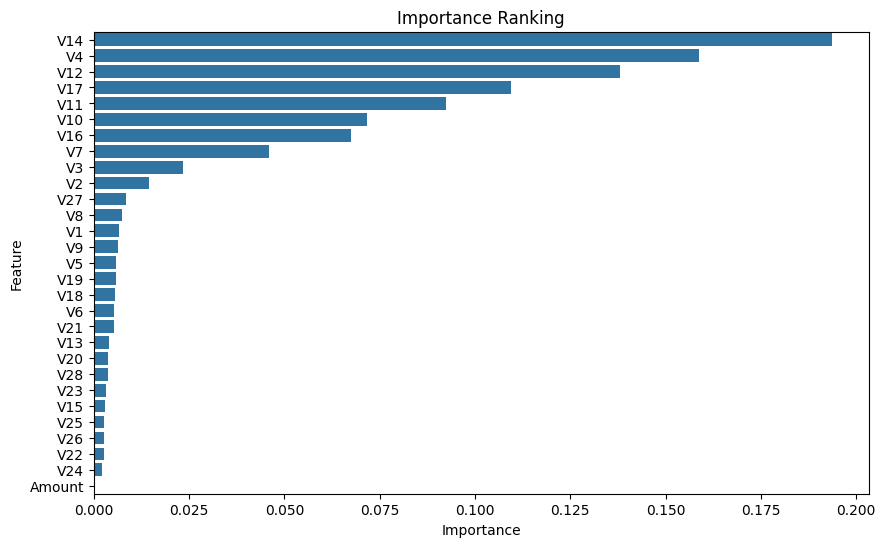

In [42]:
#using a bar chart to display the importance

plt.figure(figsize=(10,6))
sns.barplot(data = feature_imp, x = 'Importance', y = 'Feature')
plt.title('Importance Ranking')
plt.show()

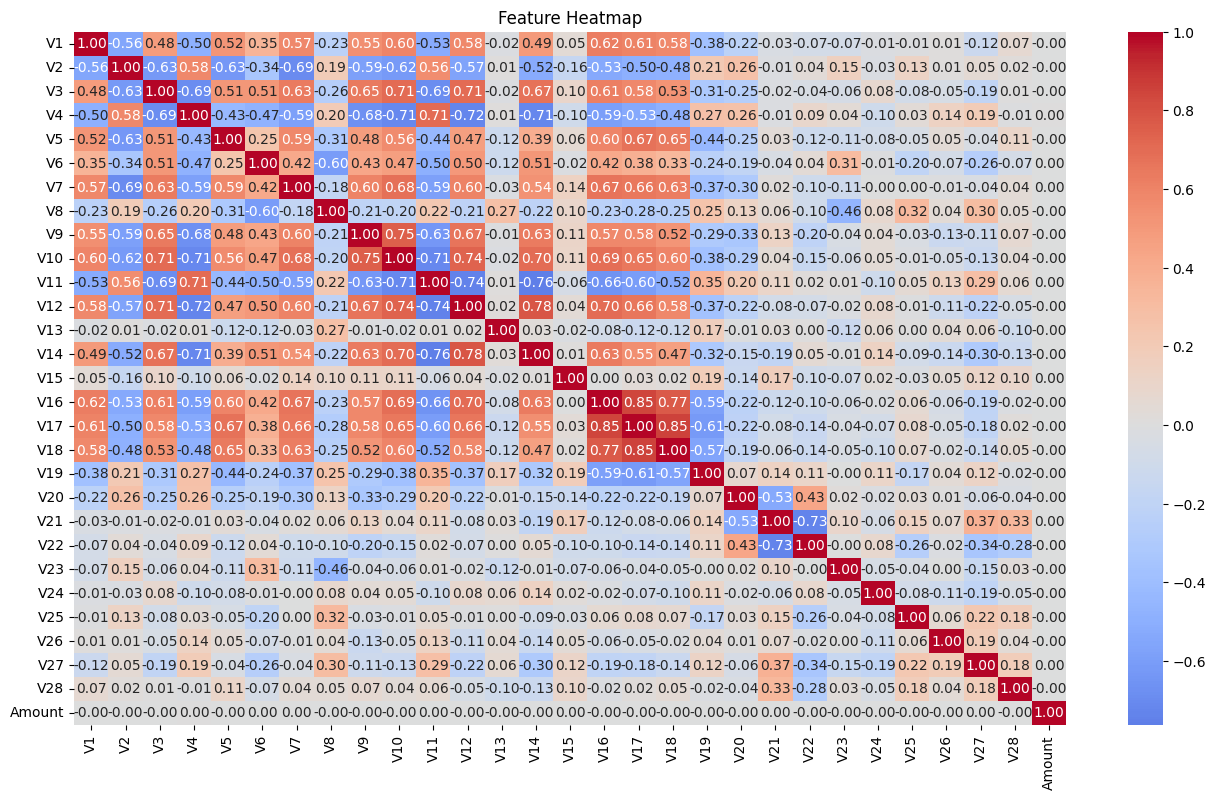

In [44]:
#calculate and plotting the correlation

plt.figure(figsize=(16,9))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, cmap = 'coolwarm', center = 0, annot = True, fmt = '.2f')
plt.title('Feature Heatmap')
plt.show()

In [ ]:
#ROC and Auc curve
# a perfect model has an AuC = 1 while a random classifier has an auc of 0.5
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:,1]
fpr,tpr,_ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr,tpr)

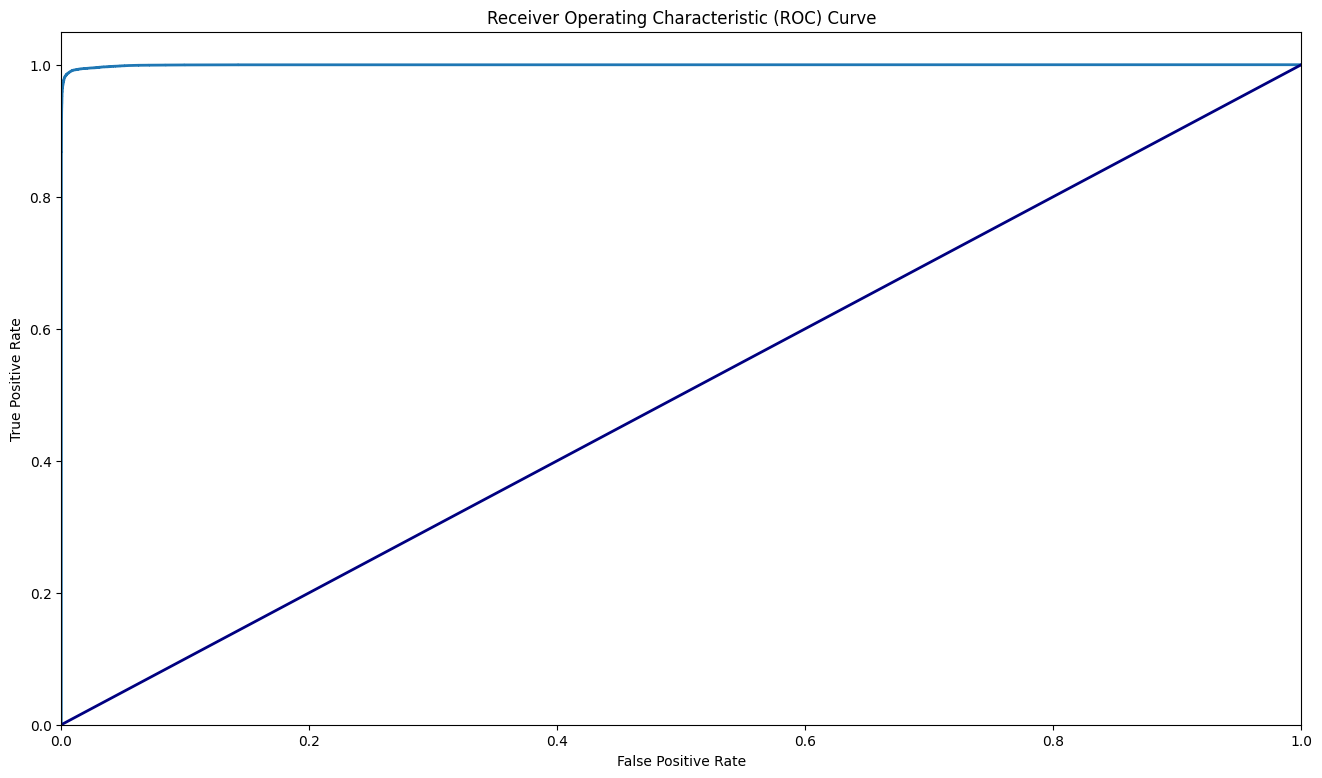

In [46]:
plt.figure(figsize=(16,9))
plt.plot(fpr, tpr, lw=2, label = f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],color = 'navy', lw = 2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()